# Description of file:

This file aims to calculate the fractal dimension of our benchmark fractals, using box sizes lists that has box-size of two pizels, and box sizes list with out this box size.

## Functions:

### `fractal_dimension(Z, threshold = 0.9)`:
This uses two arguments: `Z` = one of the normalised image, and `threshold` = the threhsold value for conversion from pixel intensities to binary arrays. This returns the coefficient of the graph in of Minkowski-Bouligand graph and `x` and `y` values (which are the log(s) and log(N(s)) from:

$$\ln[N(s)] = \textrm{ - Dimension}\: * \: \ln(s) + h(s) $$

### `linreg(x,y)`:
This uses the `LinearRegression()` function from `sklearn` to fit the resultant x and y values from the `fractal_dimension()` method, to a linear graph.

### `save_csv()`:
Saves the results from the `fractal_dimension()` method to a csv, using function `csv.DictWriter`. 

In [362]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms

In [363]:
def linreg(x1,y1):
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)
    model.fit(x1, y1)
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    print(f"score: {model.score(x1, y1)}")
    plt.scatter(x1, y1,color='g')
    plt.plot(x1, model.predict(x1),color='k')
    plt.xlabel('log(s)')
    plt.ylabel('log[N(s)]')

In [364]:

def fractal_dimension(Z, threshold=0.9):
    
    # make sure image is 2D
    assert(len(Z.shape) == 2)
    
    # method to find the box counts at particular box size (k) of image (Z)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        return len(np.where((S > 0) & (S < k*k))[0]), np.where((S > 0) & (S < k*k))


    Z = (Z <= threshold) #conversion of pixel intensities to binary array using threshold

    p = min(Z.shape) #find the size of the smaller side of the 2D image
    
    # below we find the value of 2^n which is less than the smallest side of the image (p)
    n = 2**np.floor(np.log(p)/np.log(2))
    n = int(np.log(n)/np.log(2))
    
    # form a np array of the value n from 2^1
    sizes = 2**np.arange(n, 1, -1)
    sizes = list(sizes)
    sizes = sizes[1:]
    
    # box size of two pixels added for investigation
    sizes.append(2)
    print("box size list is : {}".format(sizes))
    
    # iterate through boxcount() method with the various sizes in `sizes` list
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size)[0])
 
    
    
    print("box-counts are: {}".format(counts))
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    return -coeffs[0], x, y 




In [365]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) # reads the image in 
    
    I = I/256 #normalise image pixel intensities to 0 and 1
    
    coeff, x, y  = fractal_dimension(I, pixel_threshold) # call fractal dimension method
    
    print("Minkowski–Bouligand dimension (computed): ", coeff) #print the resultant box-counting value
    return coeff, x, y

box size list is : [256, 128, 64, 32, 16, 8, 4, 2]
box-counts are: [5, 11, 24, 66, 137, 318, 734, 1508]
Minkowski–Bouligand dimension (computed):  1.1927841765117912
intercept: [8.21725278]
slope: [[-1.19278418]]
score: 0.9991077246737975


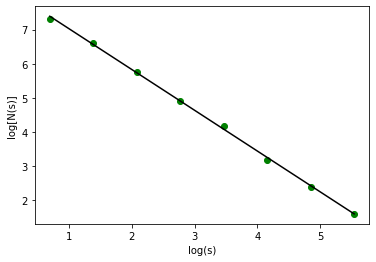

In [366]:
coeff, x, y = start("./SelfSimilarFractals/GreatBritain.png")
linreg(x,y)

box size list is : [512, 256, 128, 64, 32, 16, 8, 4, 2]
box-counts are: [8, 16, 45, 128, 362, 1046, 3041, 8400, 14136]
Minkowski–Bouligand dimension (computed):  1.424074788025268
intercept: [10.82074541]
slope: [[-1.42407479]]
score: 0.9965696087554117


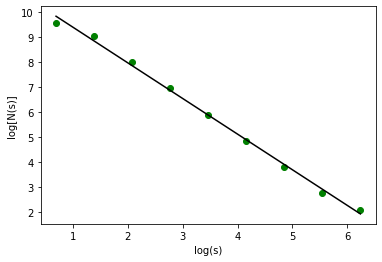

In [367]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
linreg(x,y)

box size list is : [512, 256, 128, 64, 32, 16, 8, 4, 2]
box-counts are: [7, 12, 28, 71, 184, 465, 1235, 3118, 7019]
Minkowski–Bouligand dimension (computed):  1.2930054699462399
intercept: [9.74819589]
slope: [[-1.29300547]]
score: 0.9974142361639762


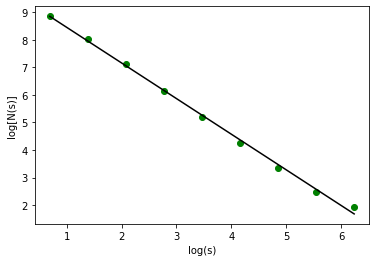

In [368]:
coeff, x, y = start("./SelfSimilarFractals/Douady_rabbitNew.png")
linreg(x,y)

box size list is : [256, 128, 64, 32, 16, 8, 4, 2]
box-counts are: [11, 26, 61, 145, 348, 842, 2061, 3993]
Minkowski–Bouligand dimension (computed):  1.2344532998250655
intercept: [9.25731353]
slope: [[-1.2344533]]
score: 0.9992850324075145


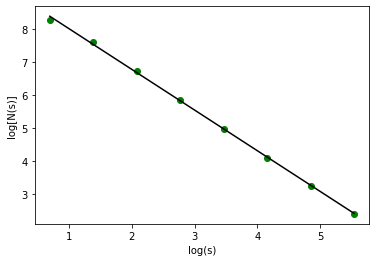

In [369]:
coeff, x, y = start("./SelfSimilarFractals/JuliaSetNew.png")
linreg(x,y)

box size list is : [1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]
box-counts are: [6, 13, 28, 76, 199, 508, 1308, 3462, 6220, 8342]
Minkowski–Bouligand dimension (computed):  1.2406342020156833
intercept: [10.39306881]
slope: [[-1.2406342]]
score: 0.9921005375276231


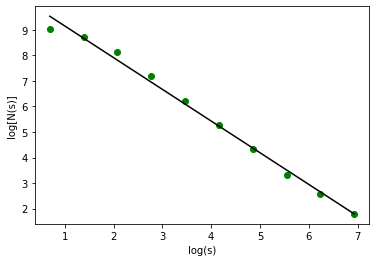

In [370]:
coeff, x, y = start("./SelfSimilarFractals/irelandcoastNew.png")
linreg(x,y)

In [371]:

def fractal_dimension(Z, threshold=0.9):
    
    # make sure image is 2D
    assert(len(Z.shape) == 2)
    
    # method to find the box counts at particular box size (k) of image (Z)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        return len(np.where((S > 0) & (S < k*k))[0]), np.where((S > 0) & (S < k*k))


    Z = (Z <= threshold) #conversion of pixel intensities to binary array using threshold

    p = min(Z.shape) #find the size of the smaller side of the 2D image
    
    # below we find the value of 2^n which is less than the smallest side of the image (p)
    n = 2**np.floor(np.log(p)/np.log(2))
    n = int(np.log(n)/np.log(2))
    
    # form a np array of the value n from 2^1
    sizes = 2**np.arange(n, 1, -1)
    sizes = list(sizes)
    sizes = sizes[1:]
    
    print("box size list is : {}".format(sizes))
    
    # iterate through boxcount() method with the various sizes in `sizes` list
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size)[0])

    
    print("box-counts are: {}".format(counts))
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    return -coeffs[0], x, y 





In [372]:
def save_csv(xs, ys, filename):
    data_dict = []
    for i in  range(len(xs)):
        xval = str(xs[i])
        yval = str(ys[i])
        temp = dict(xs = xval, ys = yval)
        data_dict.append(temp)

    field_names = ['xs', 'ys']
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(data_dict)

box size list is : [256, 128, 64, 32, 16, 8, 4]
box-counts are: [5, 11, 24, 66, 137, 318, 734]
Minkowski–Bouligand dimension (computed):  1.207610597478608
intercept: [8.27891413]
slope: [[-1.2076106]]
score: 0.9991460236354204


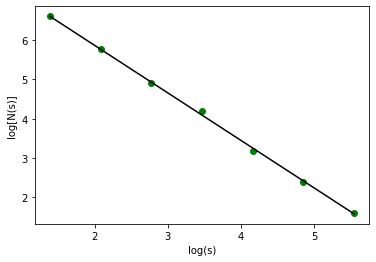

In [378]:
coeff, x, y = start("./SelfSimilarFractals/greatbritain.png")
save_csv(x,y,"./csvs/greatbritain.csv")
linreg(x,y)

box size list is : [512, 256, 128, 64, 32, 16, 8, 4]
box-counts are: [8, 16, 45, 128, 362, 1046, 3041, 8400]
Minkowski–Bouligand dimension (computed):  1.4669184976174214
intercept: [11.01872538]
slope: [[-1.4669185]]
score: 0.9982122415395117


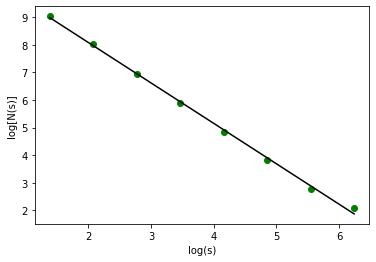

In [379]:
coeff, x, y = start("./SelfSimilarFractals/SierpinskiTriangleHD.png")
save_csv(x,y,"./csvs/SierpinskiTriangleHD.csv")
linreg(x,y)

box size list is : [512, 256, 128, 64, 32, 16, 8, 4]
box-counts are: [7, 12, 28, 71, 184, 465, 1235, 3118]
Minkowski–Bouligand dimension (computed):  1.292321749423826
intercept: [9.74503643]
slope: [[-1.29232175]]
score: 0.99630717590799


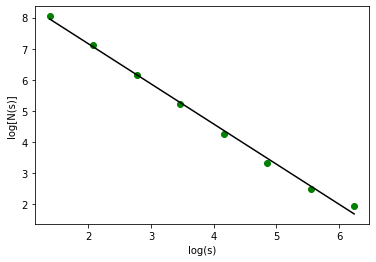

In [380]:
coeff, x, y = start("./SelfSimilarFractals/Douady_rabbitNew.png")
save_csv(x,y,"./csvs/Douady_rabbitNew.csv")
linreg(x,y)

box size list is : [256, 128, 64, 32, 16, 8, 4]
box-counts are: [11, 26, 61, 145, 348, 842, 2061]
Minkowski–Bouligand dimension (computed):  1.2569918243157967
intercept: [9.35104862]
slope: [[-1.25699182]]
score: 0.9999294392612439


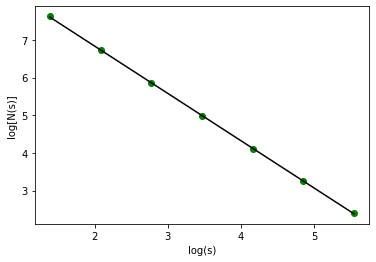

In [381]:
coeff, x, y = start("./SelfSimilarFractals/JuliaSetNew.png")
save_csv(x,y,"./csvs/JuliaSetNew.csv")
linreg(x,y)

box size list is : [1024, 512, 256, 128, 64, 32, 16, 8, 4]
box-counts are: [6, 13, 28, 76, 199, 508, 1308, 3462, 6220]
Minkowski–Bouligand dimension (computed):  1.3012356218512242
intercept: [10.70111064]
slope: [[-1.30123562]]
score: 0.998004657865971


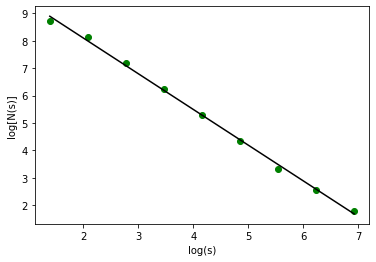

In [382]:
coeff, x, y = start("./SelfSimilarFractals/irelandcoastNew.png")
save_csv(x,y,"./csvs/irelandcoastNew.csv")
linreg(x,y)